# linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("package loaded")

package loaded



 Type of 'train_X' is  <class 'numpy.ndarray'>
 Shape of 'train_X' is (1, 20)
 Type of 'train_Y' is  <class 'numpy.ndarray'>
 Shape of 'train_Y' is (1, 20)


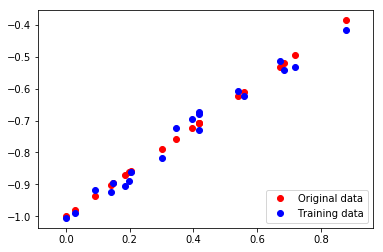

In [2]:
# generate training data
np.random.seed(1)
def f(x, a, b):
    n = x.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val 
    return vals

Wref = 0.7
bref = -1
n = 20
noise_var = 0.001
train_X = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)  # 产生方差为0.1的随机数
n_samples = train_X.size

print ("")
print (" Type of 'train_X' is ", type(train_X))
print (" Shape of 'train_X' is %s" % (train_X.shape,))
print (" Type of 'train_Y' is ", type(train_Y))
print (" Shape of 'train_Y' is %s" % (train_Y.shape,))

# plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')  # 原始数据
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data') # 加入高斯噪声后的数据
plt.axis('equal')
plt.legend(loc='lower right')

In [3]:
# prepare for linear regression

# parameters
train_epochs = 2000
display_step = 50

# set tensorflow graph
X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# construct a model
Y_ = tf.add(tf.multiply(X, W), b)

# define loss function and optimizer
learning_rate = 0.01
loss = tf.reduce_mean(tf.pow(Y_ - Y, 2))
# loss = tf.sqrt(tf.reduce_sum(tf.pow(activation-Y, 2)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

"""
 tf.reduce_sum()
 tf.reduce_mean()
 _____

 tf.pow(Yhat, Y, 2)
 tf.nn.softmax_cross_entropy_with_logits(Yhat, Y)
 _____

 tf.train.GradientDescentOptimizer(0.05).minimize(cost)
 tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
"""

# initializer
init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
# run
sess = tf.Session()
# initialze
sess.run(init)
for epoch in range(train_epochs):
    for (x, y) in zip(train_X[0, :], train_Y[0, :]):
        sess.run(optimizer, feed_dict={X:x, Y:y})
    
    # checkout
    if epoch % display_step == 0:
        costval = sess.run(loss, feed_dict={X: train_X, Y:train_Y})
        print ("Epoch: %04d" %(epoch + 1), " cost= %.5f" %(costval), 
               " W is: %.5f" %(sess.run(W)), "b is: %.5f" %(sess.run(b)))

# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
Yopt = f(train_X, Wopt, bopt)

Epoch: 0001  cost= 0.21532  W is: -0.69644 b is: -0.17153
Epoch: 0051  cost= 0.01696  W is: 0.16558 b is: -0.79544
Epoch: 0101  cost= 0.00264  W is: 0.50466 b is: -0.92803
Epoch: 0151  cost= 0.00083  W is: 0.62471 b is: -0.97497
Epoch: 0201  cost= 0.00060  W is: 0.66721 b is: -0.99159
Epoch: 0251  cost= 0.00057  W is: 0.68226 b is: -0.99748
Epoch: 0301  cost= 0.00057  W is: 0.68759 b is: -0.99956
Epoch: 0351  cost= 0.00056  W is: 0.68947 b is: -1.00030
Epoch: 0401  cost= 0.00056  W is: 0.69014 b is: -1.00056
Epoch: 0451  cost= 0.00056  W is: 0.69038 b is: -1.00065
Epoch: 0501  cost= 0.00056  W is: 0.69046 b is: -1.00068
Epoch: 0551  cost= 0.00056  W is: 0.69049 b is: -1.00069
Epoch: 0601  cost= 0.00056  W is: 0.69050 b is: -1.00070
Epoch: 0651  cost= 0.00056  W is: 0.69050 b is: -1.00070
Epoch: 0701  cost= 0.00056  W is: 0.69050 b is: -1.00070
Epoch: 0751  cost= 0.00056  W is: 0.69050 b is: -1.00070
Epoch: 0801  cost= 0.00056  W is: 0.69050 b is: -1.00070
Epoch: 0851  cost= 0.00056  W 

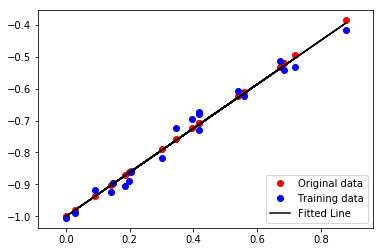

In [5]:
# plot result
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')  # 原始数据
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data') # 加入高斯噪声后的数据
plt.plot(train_X[0, :], Yopt[0, :], 'k-', label='Fitted Line')  # 拟合的直线
plt.axis('equal')
plt.legend(loc='lower right')

In [6]:
sess.close()